In [1]:
import re
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ctsm_log_files = glob.glob('/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO/*_SpinupFiles/archive/timing/cesm_timing.*')
ctsm_log_files.sort()

# Initialize an empty list to store all timing results from all files
all_timing_results = []

for logfile in ctsm_log_files:
    
    with open(logfile, 'r') as f:
        lines = f.readlines()
    
    
    # The required strings to search for in the file
    search_strings = ["TOT Run Time", "CPL Run Time", "ATM Run Time", "LND Run Time"]
    
    # Dictionary to store the results
    timing_results = {}
    
    # Loop through each line in the file-like object
    for line in lines:
        line = line.strip()
        # Check if the line starts with any of the search strings
        for search_string in search_strings:
            if line.startswith(search_string):
                # Extract the number (in seconds) before the word "seconds"
                match = re.search(r"([\d\.]+) seconds", line)
                if match:
                    # Store the result in the dictionary
                    timing_results[search_string] = float(match.group(1))

    # Add the timing results from the current logfile to the overall list
    all_timing_results.append(timing_results)

# Convert the list of dictionaries to a pandas DataFrame
df_timing_results = pd.DataFrame(all_timing_results)

df_timing_results

,TOT Run Time,CPL Run Time,ATM Run Time,LND Run Time
0,4426.677,977.121,721.498,2860.737
1,4268.737,975.944,715.042,2707.130
2,4369.955,961.324,709.611,2831.460
3,4362.020,975.481,721.603,2805.634
4,3999.437,975.846,702.056,2436.007
...,...,...,...,...
666,4198.908,973.288,740.008,2611.793
667,4063.631,977.544,714.368,2497.827
668,3717.360,962.180,739.664,2169.952
669,3663.247,966.545,780.293,2105.796


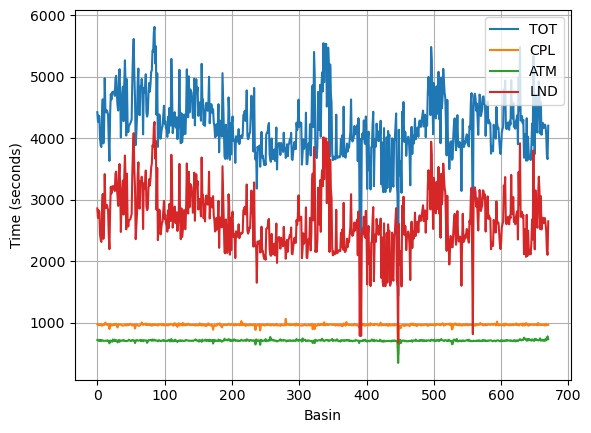

In [2]:
df_timing_results['TOT Run Time'].plot(label='TOT')
df_timing_results['CPL Run Time'].plot(label='CPL')
df_timing_results['ATM Run Time'].plot(label='ATM')
df_timing_results['LND Run Time'].plot(label='LND')

plt.grid('on')
plt.xlabel('Basin')
plt.ylabel('Time (seconds)')

plt.legend()
plt.show()

0.17137999889504224


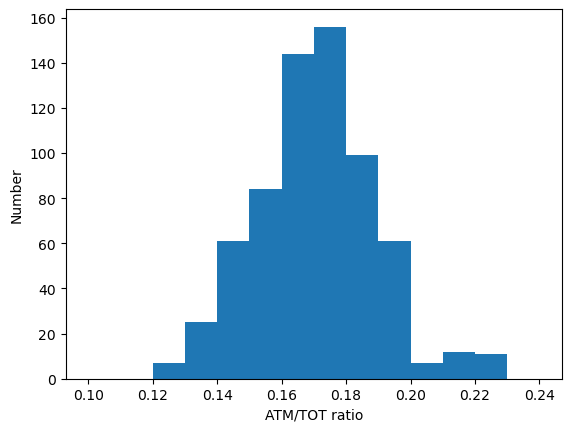

In [3]:
plt.hist(df_timing_results['ATM Run Time']/df_timing_results['TOT Run Time'], np.arange(0.1, 0.25, 0.01))
print(np.nanmean(df_timing_results['ATM Run Time']/df_timing_results['TOT Run Time']))
plt.xlabel('ATM/TOT ratio')
plt.ylabel('Number')
plt.show()

In [4]:
len(ctsm_log_files)

671